## Linear Regression with NumPy 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rmenegaux/Intro-to-Neural-Nets-AIMS-2025/blob/main/lecture1_linear_regression_numpy.ipynb)


### Part 1: Gradients
----

$\langle \cdot, \cdot \rangle$ is the standard euclidean inner product $\langle x , y \rangle = x^T y$

Let $x \in \mathbb{R}^n$ with $n\in \mathbb{N}$.

Let $f: \mathbb{R}^n \rightarrow \mathbb{R}$ be a differentiable function.

The **gradient** $\nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ can be defined either by its components $$[\nabla f(x)]_i = \frac{\partial f}{\partial x_i}(x),$$
or as the unique vector $\in \mathbb{R}^n$ such that for small $h \in \mathbb{R}^n$,
$$f(x+h) \underset{\lVert h \rVert \to 0}{=} f(x) + \langle\nabla f(x), h\rangle + o(h).$$
In each of the questions, find $\nabla f$, using either one (or both) of the above definitions.

1. $f(x) = w x + b \quad w, b \in \mathbb{R}$

2. $f(x) = w^T x + b \quad w \in \mathbb{R}^n, b \in \mathbb{R}$

2. (a) $f(x)=\sigma(w^Tx + b), \quad \sigma : \mathbb{R} \rightarrow \mathbb{R}$ a differentiable function, $c\in \mathbb{R}^n$

    (b) Simplify (a) when $\sigma$ is one of these activation functions: $\sigma(x) = max(x, 0)$, $\sigma(x) =\frac 1 {1+e^{-x}}$

### Part 2: Linear Regression
---

## Linear Regression

Linear regression is a fundamental supervised learning algorithm used for predicting continuous values. Given an input feature vector **x**, the model computes:

$$
\hat{y} = w^T x + b
$$

where **w** is the weight vector and **b** is the bias term.

### Loss Function

To measure the error between predicted values **$\hat{y}$** and true values **$y$**, we use the **Mean Squared Error (MSE)** loss:

$$
L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where **N** is the number of training samples.

### Optimization: Gradient Descent

To minimize the loss, we update **w** and **b** using **gradient descent**. The gradients of the loss with respect to **w** and **b** are:

$$
\frac{\partial L}{\partial w} = -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y}_i)
$$

$$
\frac{\partial L}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)
$$

We update **w** and **b** iteratively, by **gradient descent**:

$$
w \leftarrow w - \alpha \frac{\partial L}{\partial w}
$$

$$
b \leftarrow b - \alpha \frac{\partial L}{\partial b}
$$

where **$\alpha$** is the learning rate.

Linear regression models a straight-line relationship between the input and output, is fast to compute, and in many practical scenarios a strong baseline model.


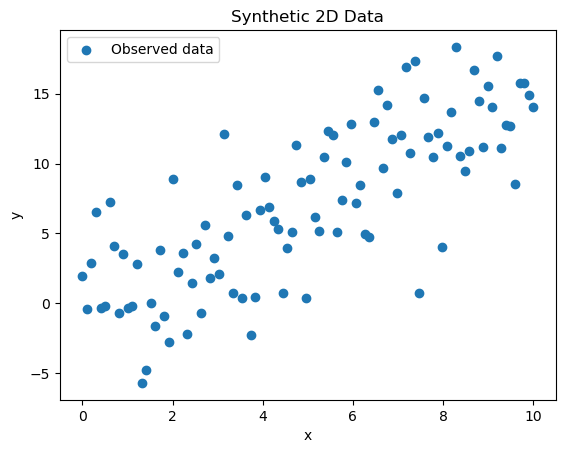

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 1.5 * x + 2 * np.random.normal(0, 2, size=x.shape)

# Plot data
plt.scatter(x, y, label='Observed data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic 2D Data")
plt.legend()
plt.show()

In [ ]:
# Complete the following functions:
def mse_loss(y_hat, y):
    '''
    Computes the Mean Squared Error (MSE) loss.

    Arguments:
    y_hat -- Predicted values, shape (N,)
    y -- True values, shape (N,)

    Returns:
    Mean squared error loss (scalar)
    '''
    return ...


def compute_ols_gradients(x, y, w, b):
    '''
    Computes the gradients of the Ordinary Least Squares (OLS) loss 
    with respect to the weight `w` and bias `b` in simple linear regression.

    Arguments:
    x -- Input features, shape (N,) (single feature per sample)
    y -- True target values, shape (N,)
    w -- Weight parameter (scalar)
    b -- Bias term (scalar)

    Returns:
    grad_w -- Gradient of the MSE loss with respect to `w` (scalar)
    grad_b -- Gradient of the MSE loss with respect to `b` (scalar)
    '''
    y_hat = ...  # Predicted values
    grad_w = ...  # Partial derivative w.r.t. w
    grad_b = ...  # Partial derivative w.r.t. b
    return grad_w, grad_b


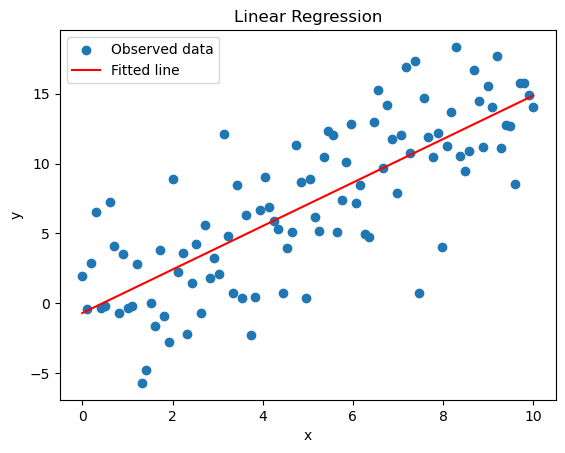

In [ ]:
# Train using gradient descent
# Initialize with random weights
w, b = np.random.randn(), np.random.randn()
learning_rate = 0.01
num_epochs = 1000

for _ in range(num_epochs):
    grad_w, grad_b = compute_ols_gradients(x, y, w, b)
    # fill in the update functions 
    w = ...
    b = ...

# Plot fitted line
y_hat = ...
plt.scatter(x, y, label='Observed data')
plt.plot(x, y_hat, color='red', label='Fitted line')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()


### Part 3: Classification with Logistic Regression

Logistic regression is a classification algorithm that predicts the probability of a binary outcome. Given an input feature vector **x**, the model computes:

$$
z = w^T x + b
$$

where **w** is the weight vector and **b** is the bias term. Instead of using this value directly for classification, we apply the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This maps the output to a probability between 0 and 1. The predicted class is determined by thresholding:

$$
\hat{y} =
\begin{cases}
1, & \text{if } \sigma(z) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$

To train the model, we minimize the **binary cross-entropy loss**:

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right)
$$

where **y** is the true label and **ŷ** is the predicted probability.

Gradient descent is used to update **w** and **b** iteratively to minimize this loss.

Logistic regression is a linear classifier, meaning it assumes the data is separable by a straight line (or hyperplane in higher dimensions).


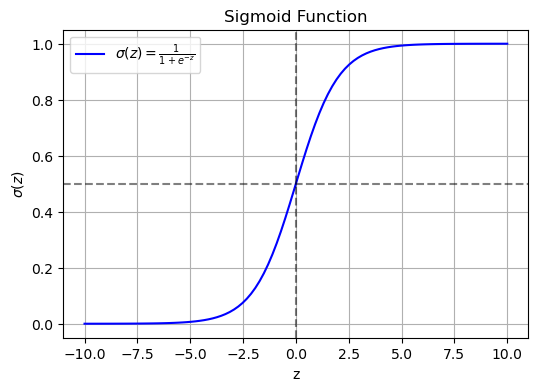

In [ ]:
# Define sigmoid function
def sigmoid(z):
    return ...

# Generate input values
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='b')
plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()

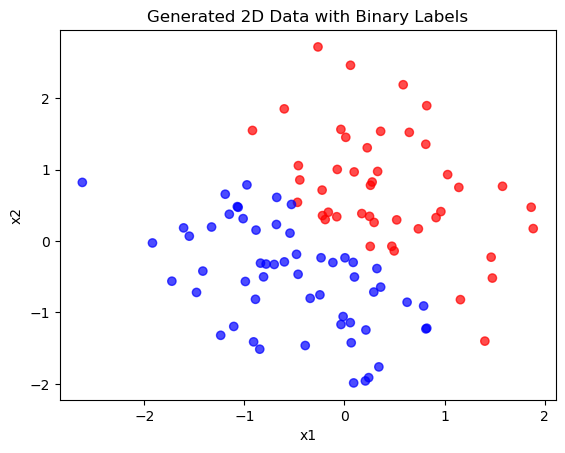

In [ ]:
# Generate synthetic 2D classification data
np.random.seed(42)
x = np.random.randn(100, 2)
y = (x[:, 0] + x[:, 1] > 0).astype(int)  # Binary classification

# Plot data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Generated 2D Data with Binary Labels")
plt.show()

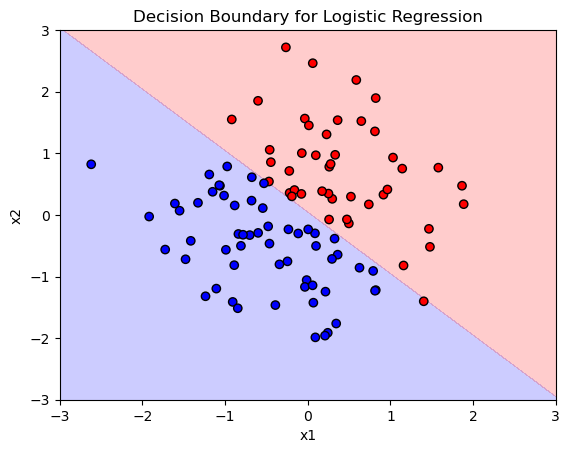

In [36]:
# Define gradient descent for linear regression
w = np.random.randn(2)
b = np.random.randn()
learning_rate = 0.1
num_epochs = 1000

def bce_loss(y_hat, y):
    '''
    Returns the binary cross-entropy (BCE) loss for predictions `y_hat` in [0,1]
    and ground-truth binary labels `y`
    '''
    return - np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def compute_logistic_gradients(x, y, w, b):
    '''
    Compute the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.

    Arguments:
    x -- Input features, shape (N, d), where N is the number of samples and d is the number of features.
    y -- Binary labels (0 or 1), shape (N,).
    w -- Weight vector, shape (d,).
    b -- Bias term (scalar).

    Returns:
    grad_w -- Gradient of the BCE loss with respect to w, shape (d,).
    grad_b -- Gradient of the BCE loss with respect to b (scalar).
    '''
    y_hat = sigmoid(x @ w + b)
    grad_w = np.mean((y_hat - y)[:, None] * x, axis=0)
    grad_b = np.mean(y_hat - y)
    return grad_w, grad_b

# Train using gradient descent
for _ in range(num_epochs):
    grad_w, grad_b = compute_logistic_gradients(x, y, w, b)
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
z = sigmoid(grid @ w + b).reshape(xx.shape)

plt.contourf(xx, yy, z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary for Logistic Regression")
plt.show()